## LOAN PREDICTION

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
train = pd.read_csv('CRM3_1.csv')

In [60]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,WebClick_Deposit,WebClick_Deposit_Total,WebClick_Cumm_Time_Spent,CreditCard
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,Yes,43,65,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,Yes,58,502,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,Yes,34,1530,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,Yes,46,1035,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,Yes,54,1468,yes


In [61]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'WebClick_Deposit', 'WebClick_Deposit_Total',
       'WebClick_Cumm_Time_Spent', 'CreditCard'],
      dtype='object')

In [62]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous,WebClick_Deposit_Total,WebClick_Cumm_Time_Spent
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,25.066207,352.759720
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,27.621023,422.673542
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,17.000000,213.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,41.000000,527.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,101.000000,1599.000000


In [63]:
train.shape

(11162, 20)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       11162 non-null  int64 
 1   job                       11162 non-null  object
 2   marital                   11162 non-null  object
 3   education                 11162 non-null  object
 4   default                   11162 non-null  object
 5   balance                   11162 non-null  int64 
 6   housing                   11162 non-null  object
 7   loan                      11162 non-null  object
 8   contact                   11162 non-null  object
 9   day                       11162 non-null  int64 
 10  month                     11162 non-null  object
 11  duration                  11162 non-null  int64 
 12  campaign                  11162 non-null  int64 
 13  pdays                     11162 non-null  int64 
 14  previous              

In [65]:
train.isnull().any()

age                         False
job                         False
marital                     False
education                   False
default                     False
balance                     False
housing                     False
loan                        False
contact                     False
day                         False
month                       False
duration                    False
campaign                    False
pdays                       False
previous                    False
poutcome                    False
WebClick_Deposit            False
WebClick_Deposit_Total      False
WebClick_Cumm_Time_Spent    False
CreditCard                  False
dtype: bool

In [66]:
train.isnull().sum()

age                         0
job                         0
marital                     0
education                   0
default                     0
balance                     0
housing                     0
loan                        0
contact                     0
day                         0
month                       0
duration                    0
campaign                    0
pdays                       0
previous                    0
poutcome                    0
WebClick_Deposit            0
WebClick_Deposit_Total      0
WebClick_Cumm_Time_Spent    0
CreditCard                  0
dtype: int64

In [67]:
import seaborn as sns

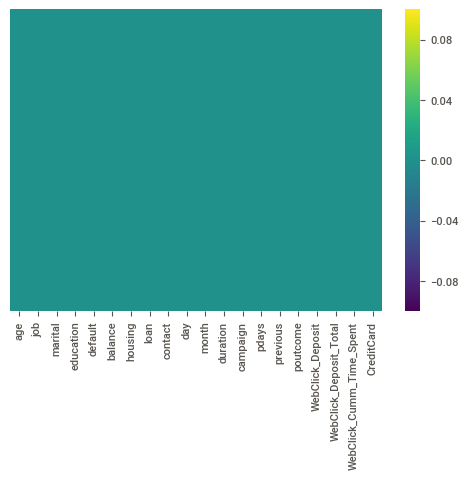

In [68]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

In [69]:
## NO NULL DATA

In [70]:
train_copy = train.copy()

In [71]:
train_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,WebClick_Deposit,WebClick_Deposit_Total,WebClick_Cumm_Time_Spent,CreditCard
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,Yes,43,65,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,Yes,58,502,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,Yes,34,1530,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,Yes,46,1035,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,Yes,54,1468,yes


In [72]:
train.dtypes

age                          int64
job                         object
marital                     object
education                   object
default                     object
balance                      int64
housing                     object
loan                        object
contact                     object
day                          int64
month                       object
duration                     int64
campaign                     int64
pdays                        int64
previous                     int64
poutcome                    object
WebClick_Deposit            object
WebClick_Deposit_Total       int64
WebClick_Cumm_Time_Spent     int64
CreditCard                  object
dtype: object

In [73]:
train['age'].nunique()

76

In [74]:
train['job'].nunique()

12

In [75]:
train['marital'].nunique()

3

In [76]:
train.nunique()

age                           76
job                           12
marital                        3
education                      4
default                        2
balance                     3805
housing                        2
loan                           2
contact                        3
day                           31
month                         12
duration                    1428
campaign                      36
pdays                        472
previous                      34
poutcome                       4
WebClick_Deposit               2
WebClick_Deposit_Total       102
WebClick_Cumm_Time_Spent    1462
CreditCard                     2
dtype: int64

In [77]:
train['CreditCard'].value_counts()

no     5873
yes    5289
Name: CreditCard, dtype: int64

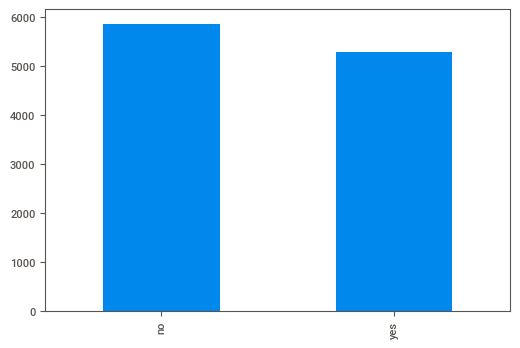

In [78]:
train['CreditCard'].value_counts().plot.bar()

In [79]:
train['CreditCard'].value_counts(normalize=True)

no     0.52616
yes    0.47384
Name: CreditCard, dtype: float64

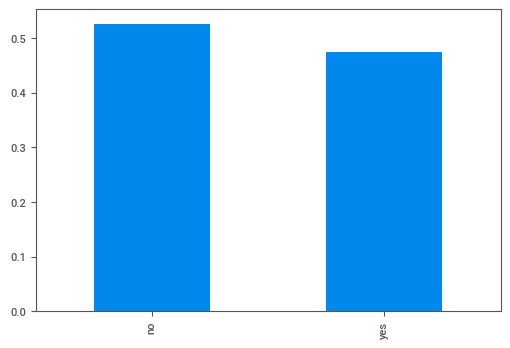

In [80]:
train['CreditCard'].value_counts(normalize=True).plot.bar()

In [81]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,WebClick_Deposit,WebClick_Deposit_Total,WebClick_Cumm_Time_Spent,CreditCard
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,Yes,43,65,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,Yes,58,502,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,Yes,34,1530,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,Yes,46,1035,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,Yes,54,1468,yes


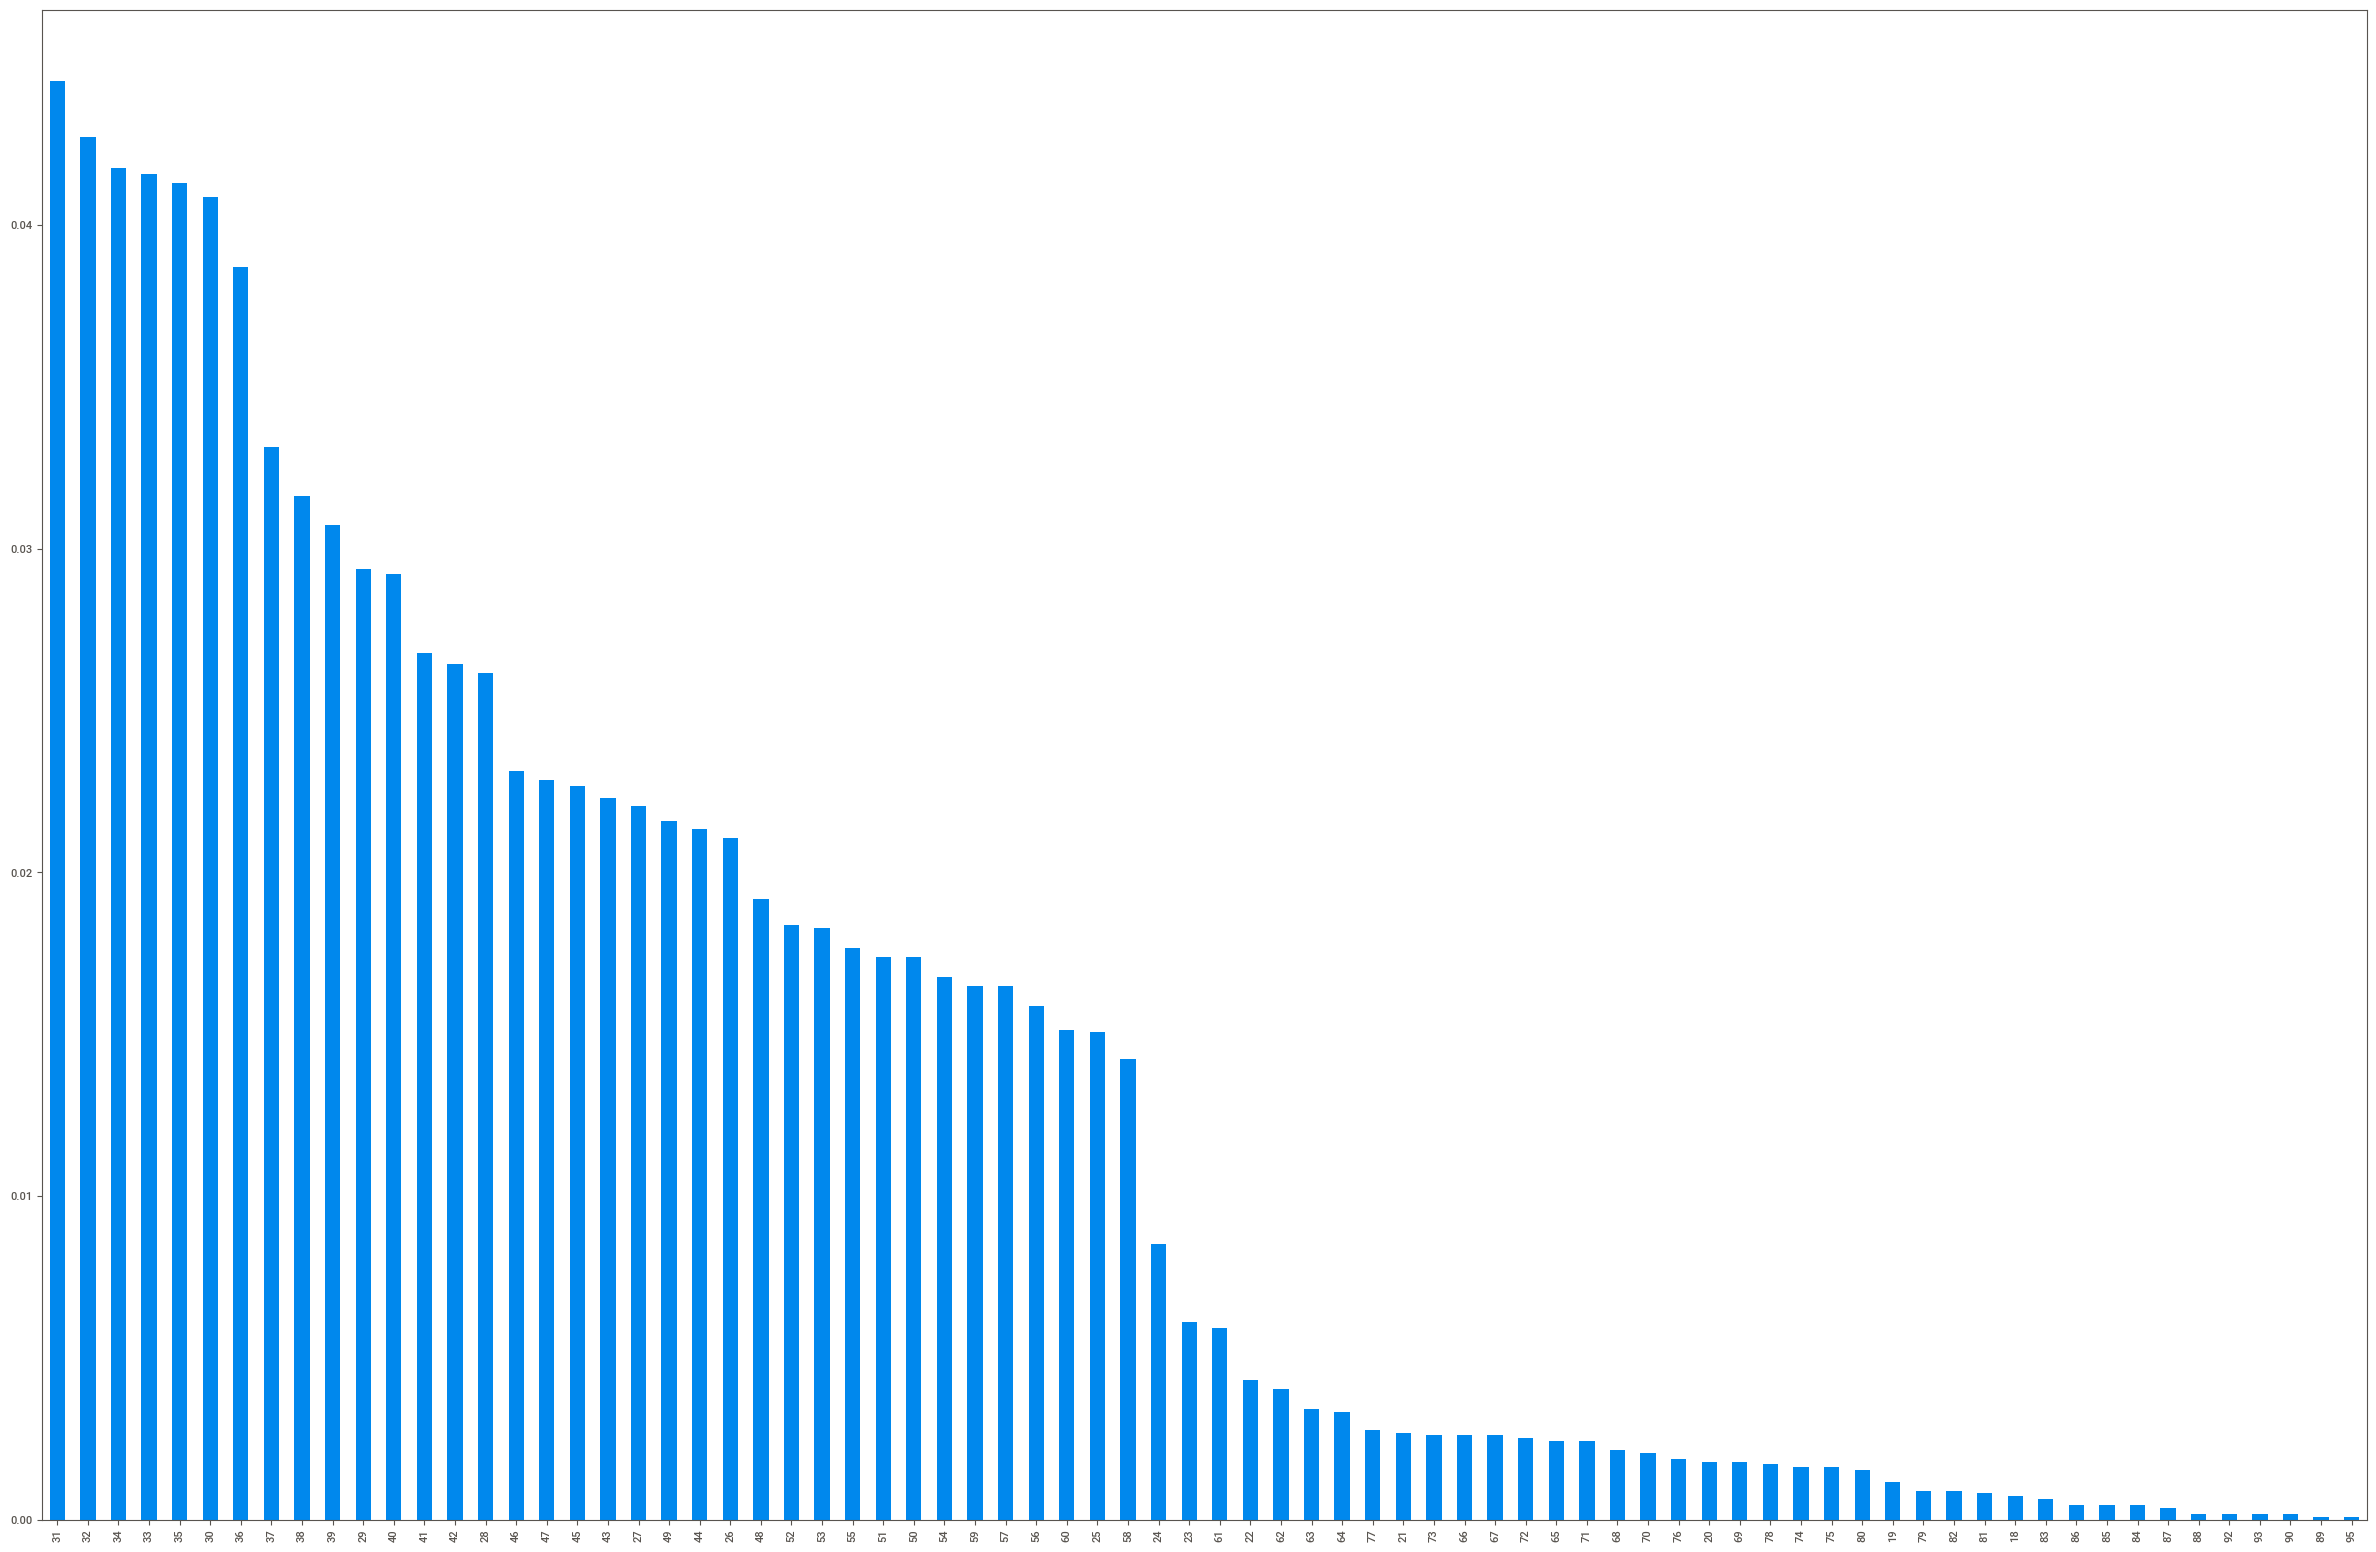

In [82]:
plt.figure(figsize = (30, 20))
train['age'].value_counts(normalize=True).plot.bar()

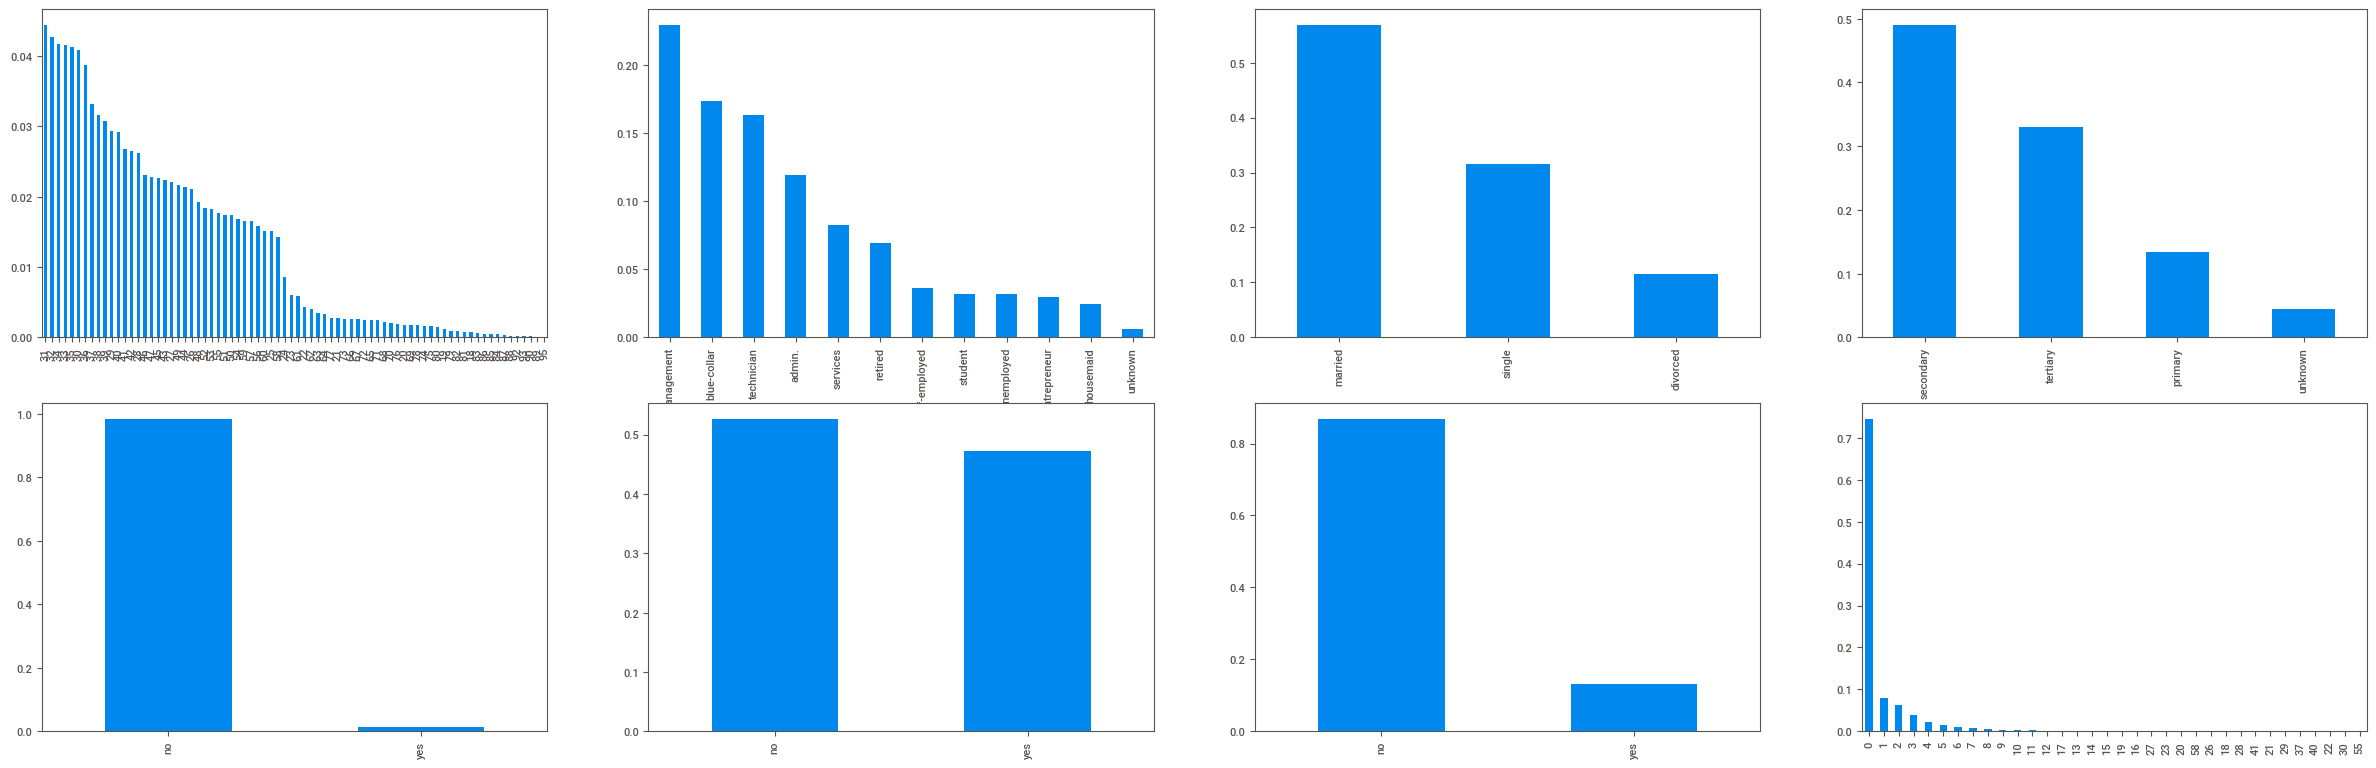

In [83]:
plt.figure(figsize = (30, 20))
plt.subplot(4,4,1)
train['age'].value_counts(normalize=True).plot.bar()
plt.subplot(4,4,2)
train['job'].value_counts(normalize=True).plot.bar()
plt.subplot(4,4,3)
train['marital'].value_counts(normalize=True).plot.bar()
plt.subplot(4,4,4)
train['education'].value_counts(normalize=True).plot.bar()
plt.subplot(4,4,5)
train['default'].value_counts(normalize=True).plot.bar()
plt.subplot(4,4,6)
train['housing'].value_counts(normalize=True).plot.bar()
plt.subplot(4,4,7)
train['loan'].value_counts(normalize=True).plot.bar()
plt.subplot(4,4,8)
train['previous'].value_counts(normalize=True).plot.bar()

In [84]:
import sweetviz

In [85]:
sweetviz_report = sweetviz.analyze([train, 'TRAIN'], target_feat='CreditCard')

:FEATURES DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)


Creating Associations graph... DONE!


In [86]:
sweetviz_report.show_html('Report.html')

In [87]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,WebClick_Deposit,WebClick_Deposit_Total,WebClick_Cumm_Time_Spent,CreditCard
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,Yes,43,65,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,Yes,58,502,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,Yes,34,1530,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,Yes,46,1035,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,Yes,54,1468,yes


In [88]:
train = train.drop(['contact'], axis=1)

In [89]:
train.shape

(11162, 19)

In [90]:
train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,WebClick_Deposit,WebClick_Deposit_Total,WebClick_Cumm_Time_Spent,CreditCard
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,Yes,43,65,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,Yes,58,502,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,Yes,34,1530,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,Yes,46,1035,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,Yes,54,1468,yes


In [91]:
train = train.drop(['day', 'month'], axis=1)
train.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,WebClick_Deposit,WebClick_Deposit_Total,WebClick_Cumm_Time_Spent,CreditCard
0,59,admin.,married,secondary,no,2343,yes,no,1042,1,-1,0,unknown,Yes,43,65,yes
1,56,admin.,married,secondary,no,45,no,no,1467,1,-1,0,unknown,Yes,58,502,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,-1,0,unknown,Yes,34,1530,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,-1,0,unknown,Yes,46,1035,yes
4,54,admin.,married,tertiary,no,184,no,no,673,2,-1,0,unknown,Yes,54,1468,yes


In [92]:
train.shape

(11162, 17)

In [93]:
train['poutcome'].nunique()

4

In [94]:
sweetviz_report1 = sweetviz.analyze([train, 'TRAIN'], target_feat='CreditCard')

:FEATURES DONE:                    |█████████████████████| [100%]   00:08  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)


Creating Associations graph... DONE!


In [95]:
sweetviz_report1.show_html('Report.html')

In [96]:
train['pdays'].nunique()

472

In [97]:
train['previous'].nunique()

34

In [98]:
train['campaign'].nunique()

36

In [99]:
train.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,WebClick_Deposit,WebClick_Deposit_Total,WebClick_Cumm_Time_Spent,CreditCard
0,59,admin.,married,secondary,no,2343,yes,no,1042,1,-1,0,unknown,Yes,43,65,yes
1,56,admin.,married,secondary,no,45,no,no,1467,1,-1,0,unknown,Yes,58,502,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,-1,0,unknown,Yes,34,1530,yes
3,55,services,married,secondary,no,2476,yes,no,579,1,-1,0,unknown,Yes,46,1035,yes
4,54,admin.,married,tertiary,no,184,no,no,673,2,-1,0,unknown,Yes,54,1468,yes


In [100]:
train.tail()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,WebClick_Deposit,WebClick_Deposit_Total,WebClick_Cumm_Time_Spent,CreditCard
11157,33,blue-collar,single,primary,no,1,yes,no,257,1,-1,0,unknown,No,0,0,no
11158,39,services,married,secondary,no,733,no,no,83,4,-1,0,unknown,No,0,0,no
11159,32,technician,single,secondary,no,29,no,no,156,2,-1,0,unknown,No,0,0,no
11160,43,technician,married,secondary,no,0,no,yes,9,2,172,5,failure,No,0,0,no
11161,34,technician,married,secondary,no,0,no,no,628,1,-1,0,unknown,No,0,0,no


In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       11162 non-null  int64 
 1   job                       11162 non-null  object
 2   marital                   11162 non-null  object
 3   education                 11162 non-null  object
 4   default                   11162 non-null  object
 5   balance                   11162 non-null  int64 
 6   housing                   11162 non-null  object
 7   loan                      11162 non-null  object
 8   duration                  11162 non-null  int64 
 9   campaign                  11162 non-null  int64 
 10  pdays                     11162 non-null  int64 
 11  previous                  11162 non-null  int64 
 12  poutcome                  11162 non-null  object
 13  WebClick_Deposit          11162 non-null  object
 14  WebClick_Deposit_Total

In [102]:
train['age'].nunique()

76

In [103]:
train['age'].value_counts()

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
90      2
89      1
95      1
Name: age, Length: 76, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B6E3E9BE0>,
      dtype=object)

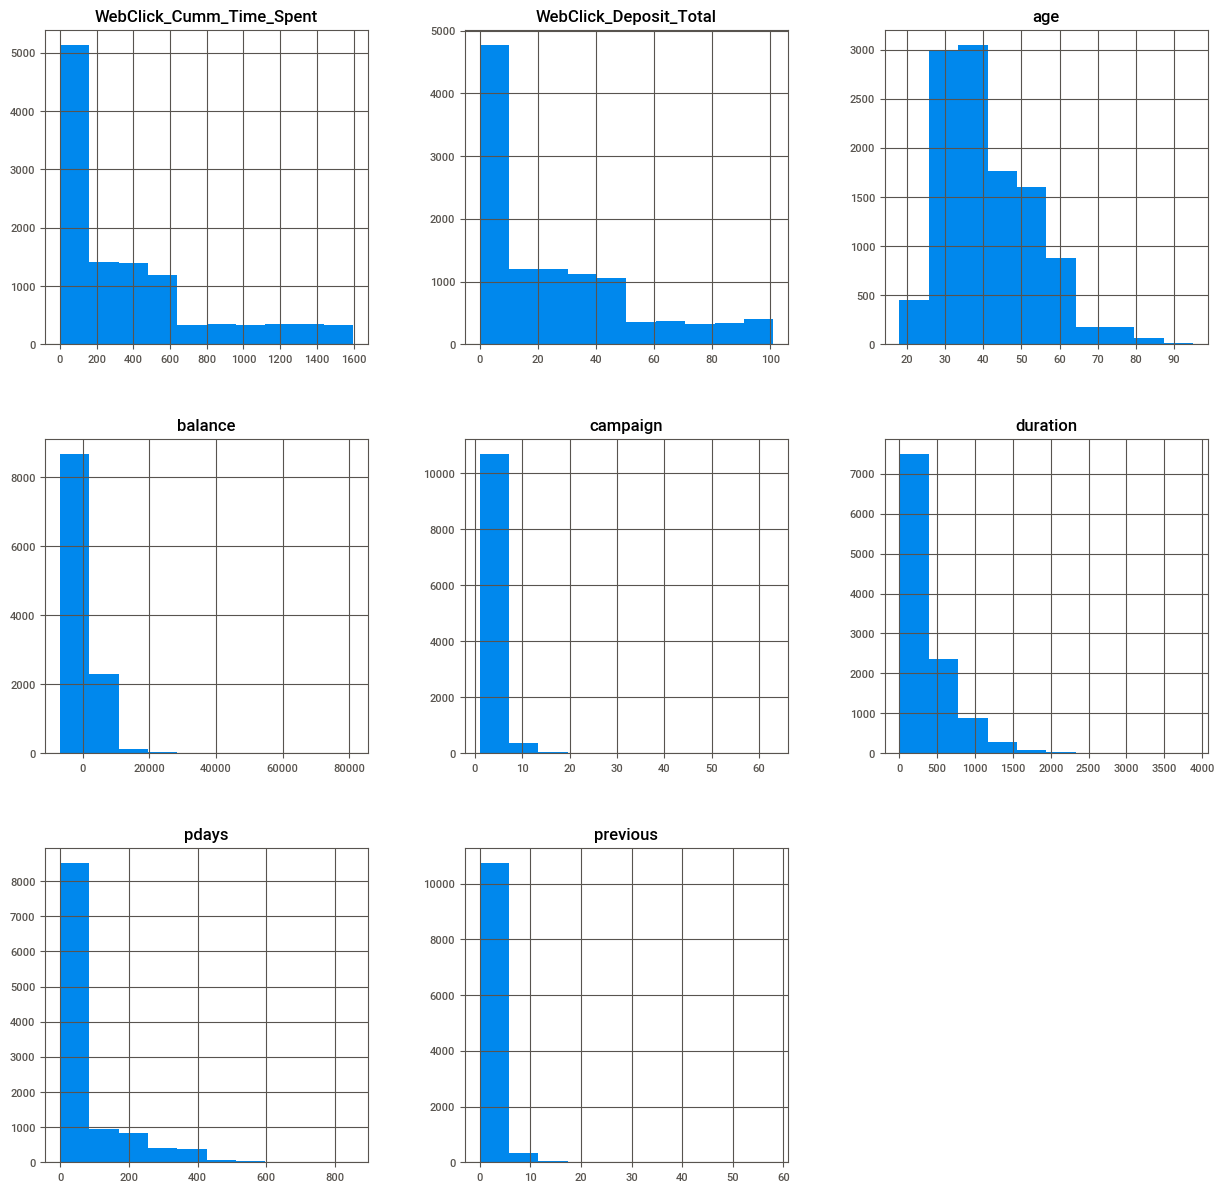

In [104]:
train.hist(figsize=(15,15))

In [105]:
train_numeric = train[['previous', 'pdays', 'duration', 'campaign', 'balance', 'age', 'WebClick_Deposit_Total', 'WebClick_Cumm_Time_Spent']]

In [54]:
train_numeric.shape

(11162, 8)

,job,marital,education,default,housing,loan,poutcome,WebClick_Deposit,CreditCard
0,admin.,married,secondary,no,yes,no,unknown,Yes,yes
1,admin.,married,secondary,no,no,no,unknown,Yes,yes
2,technician,married,secondary,no,yes,no,unknown,Yes,yes
3,services,married,secondary,no,yes,no,unknown,Yes,yes
4,admin.,married,tertiary,no,no,no,unknown,Yes,yes


In [120]:
train_new = pd.get_dummies(data=train, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome', 'WebClick_Deposit', 'CreditCard'], drop_first=True)

In [129]:
train_new.tail()

,age,balance,duration,campaign,pdays,previous,WebClick_Deposit_Total,WebClick_Cumm_Time_Spent,job_blue-collar,job_entrepreneur,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,WebClick_Deposit_Yes,CreditCard_yes
11157,33,1,257,1,-1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
11158,39,733,83,4,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11159,32,29,156,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11160,43,0,9,2,172,5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11161,34,0,628,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [130]:
train_new.head()

,age,balance,duration,campaign,pdays,previous,WebClick_Deposit_Total,WebClick_Cumm_Time_Spent,job_blue-collar,job_entrepreneur,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,WebClick_Deposit_Yes,CreditCard_yes
0,59,2343,1042,1,-1,0,43,65,0,0,...,0,0,0,1,0,0,0,1,1,1
1,56,45,1467,1,-1,0,58,502,0,0,...,0,0,0,0,0,0,0,1,1,1
2,41,1270,1389,1,-1,0,34,1530,0,0,...,0,0,0,1,0,0,0,1,1,1
3,55,2476,579,1,-1,0,46,1035,0,0,...,0,0,0,1,0,0,0,1,1,1
4,54,184,673,2,-1,0,54,1468,0,0,...,1,0,0,0,0,0,0,1,1,1


In [135]:
X = train_new.drop(columns = 'CreditCard_yes', axis=1)
y = train_new['CreditCard_yes']

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_train_Size:  {}, X_test_Size {}, y_train_size {}, y_test_size {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train_Size:  (8929, 31), X_test_Size (2233, 31), y_train_size (8929,), y_test_size (2233,)


In [140]:
## FEATURE SCALING

In [141]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [142]:
X_train.shape

(8929, 31)

In [143]:
X_test.shape

(2233, 31)

In [144]:
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [146]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [147]:
## Creating function for choosing the best model
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 5},0.879731
1,decision_tree,"{'criterion': 'gini', 'max_depth': 5}",0.886562
2,random_forest,{'n_estimators': 200},0.899440
3,svm,"{'C': 1, 'kernel': 'linear'}",0.880067


In [148]:
classifier = RandomForestClassifier(n_estimators=15, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [149]:
y_pred = classifier.predict(X_test)

In [150]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [151]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [152]:
print(cm)
print(cr)
print(acc)

[[1094  111]
 [ 150  878]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1205
           1       0.89      0.85      0.87      1028

    accuracy                           0.88      2233
   macro avg       0.88      0.88      0.88      2233
weighted avg       0.88      0.88      0.88      2233

0.8831168831168831
